what is retention rate and customer life time value?

- Retention rate measures the percentage of customers who continue to do business with a company over a specified period, indicating how well a company is keeping its customers. It’s an important metric for understanding customer loyalty and the effectiveness of retention strategies.

- Customer Lifetime Value (CLV) is a predictive metric that estimates the total revenue or profit a business can expect from a customer during their entire relationship with the company. CLV helps businesses determine how much they should invest in acquiring and retaining customers.

# RETENTION RATE ANALYSIS

     cohortyear  cohortmonth  orderyear  ordermonth  activecustomer  \
0          2011            5       2011           5              43   
1          2011            5       2011           8              36   
2          2011            5       2011          12              36   
3          2011            5       2012           2              35   
4          2011            5       2012           5              24   
..          ...          ...        ...         ...             ...   
480        2014            4       2014           5              21   
481        2014            4       2014           6              32   
482        2014            5       2014           5            1168   
483        2014            5       2014           6              20   
484        2014            6       2014           6             545   

     returncustomer  cohortsize  retentionrate  
0                 0          43           0.00  
1                36          43           0.84  


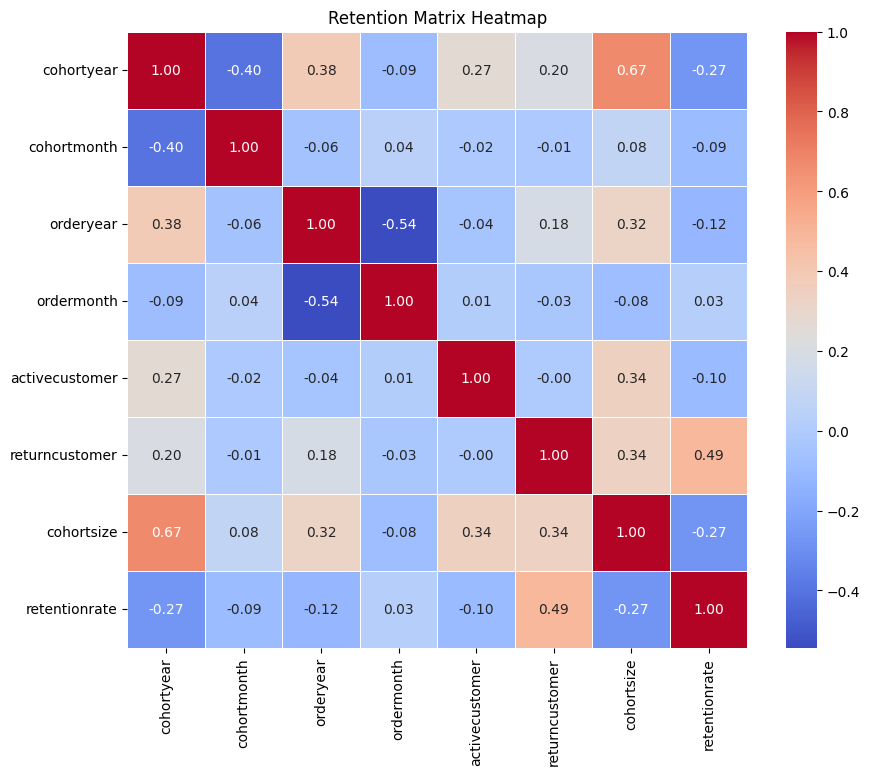

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('retentionRate2.csv')  # Replace with your actual dataset file path

print(df)

# Step 1: Preprocess the data (optional)
# You can clean and ensure you only have numeric columns for correlation
not_null_df = df.dropna()  # Remove rows with missing values (if necessary)
numeric_columns = not_null_df.select_dtypes(include='number')  # Select numeric columns

# Step 2: Calculate the correlation matrix
retention_matrix = numeric_columns.corr()

# Step 3: Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(retention_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Set the title and labels for better clarity
plt.title('Retention Matrix Heatmap')
plt.show()


Return Customers & Retention Rate (+0.49, Medium Positive Correlation)
- Indicates that repeat purchases significantly contribute to retention.

Cohort Size & Cohort Year (+0.67, Strong Positive Correlation)
- Newer cohorts tend to be larger, suggesting business growth over time.

Order Year & Retention Rate (-0.12, Moderate Negative Correlation)
- Slight decline in retention over years, possibly due to changing customer behavior or increased competition. Indicates newer cohorts have lower retention than older ones.

Cohort Month & Retention Rate (-0.09, Slight Negative Correlation)
- Later months in the year tend to have slightly lower retention. Possible seasonality effect—customers acquired in certain months may not be as loyal.

Cohort Size & Retention Rate (-0.27, Weak Negative Correlation)
- Larger cohorts tend to have lower retention, suggesting difficulty in maintaining engagement at scale.

Active Customers & Retention Rate (-0.10, Slight Negative Correlation)
- More active customers do not necessarily mean better retention.
- Some customers may make a single purchase and not return, impacting retention rates.

Recommendations
- Leverage Seasonal Trends: Identify months with lower retention and introduce targeted retention campaigns.

In [51]:
# Aggregation of metrics by cohort year and cohort month
aggregated_data = df.groupby(['cohortmonth']).agg(
    avg_retention_rate=('retentionrate', 'mean'),
    total_active_customers=('activecustomer', 'sum'),
    total_return_customers=('returncustomer', 'sum'),
    total_cohort_size=('cohortsize', 'sum')
).reset_index()

# Display the aggregated data
print(aggregated_data)


    cohortmonth  avg_retention_rate  total_active_customers  \
0             1            0.067143                    2238   
1             2            0.075758                    2010   
2             3            0.072581                    2302   
3             4            0.072258                    2306   
4             5            0.211250                    3072   
5             6            0.097273                    2475   
6             7            0.121020                    4260   
7             8            0.077037                    2820   
8             9            0.067632                    2216   
9            10            0.060200                    2384   
10           11            0.064857                    2495   
11           12            0.064595                    2158   

    total_return_customers  total_cohort_size  
0                      693              13490  
1                      626              10856  
2                      649          

Retention Rate Trends by Cohort Month:

Retention Trends:
- Low retention in early months (~6-7%).
- Spike in Month 5 (21.1%), likely due to promotions or seasonal effects.
- Gradual decline afterward (~6-12%).

Active & Returning Customers:
- Peak in Month 7 (4260 active), high return customer is month 6 (2448 returning customers), indicating strong re-engagement.
- Month 4 saw a surge in return customers (1254)—investigate possible drivers.

Cohort Size & Engagement:
- Largest cohort in Month 6 (25,779 customers).
- Engagement drops over time, needing better retention efforts.

Recommendations:
- Analyze Month 4’s success for future campaigns.
- Implement loyalty strategies beyond Month 4.
- Leverage Months 4-7 engagement strategies to sustain retention.


In [52]:
# Create 'cohortbymonth' by concatenating 'cohortyear' and month name from 'cohortmonth'
df['cohortbymonth'] = df['cohortyear'].astype(str) + '-' + df['cohortmonth'].astype(str)

# Create 'orderbymonth' by concatenating 'orderyear' and month name from 'ordermonth'
df['orderbymonth'] = df['orderyear'].astype(str) + '-' + df['ordermonth'].astype(str)

# Display the updated DataFrame
print(df[['cohortbymonth', 'orderbymonth']])

    cohortbymonth orderbymonth
0          2011-5       2011-5
1          2011-5       2011-8
2          2011-5      2011-12
3          2011-5       2012-2
4          2011-5       2012-5
..            ...          ...
480        2014-4       2014-5
481        2014-4       2014-6
482        2014-5       2014-5
483        2014-5       2014-6
484        2014-6       2014-6

[485 rows x 2 columns]


In [53]:
# Convert 'cohortbymonth' and 'orderbymonth' to string format (Year-Month)
df['cohortbymonth'] = pd.to_datetime(df['cohortbymonth'], format='%Y-%m').dt.to_period('M')
df['orderbymonth'] = pd.to_datetime(df['orderbymonth'], format='%Y-%m').dt.to_period('M')

# Sort the dataframe by 'cohortbymonth' and 'orderbymonth'
df = df.sort_values(by=['cohortbymonth', 'orderbymonth'])

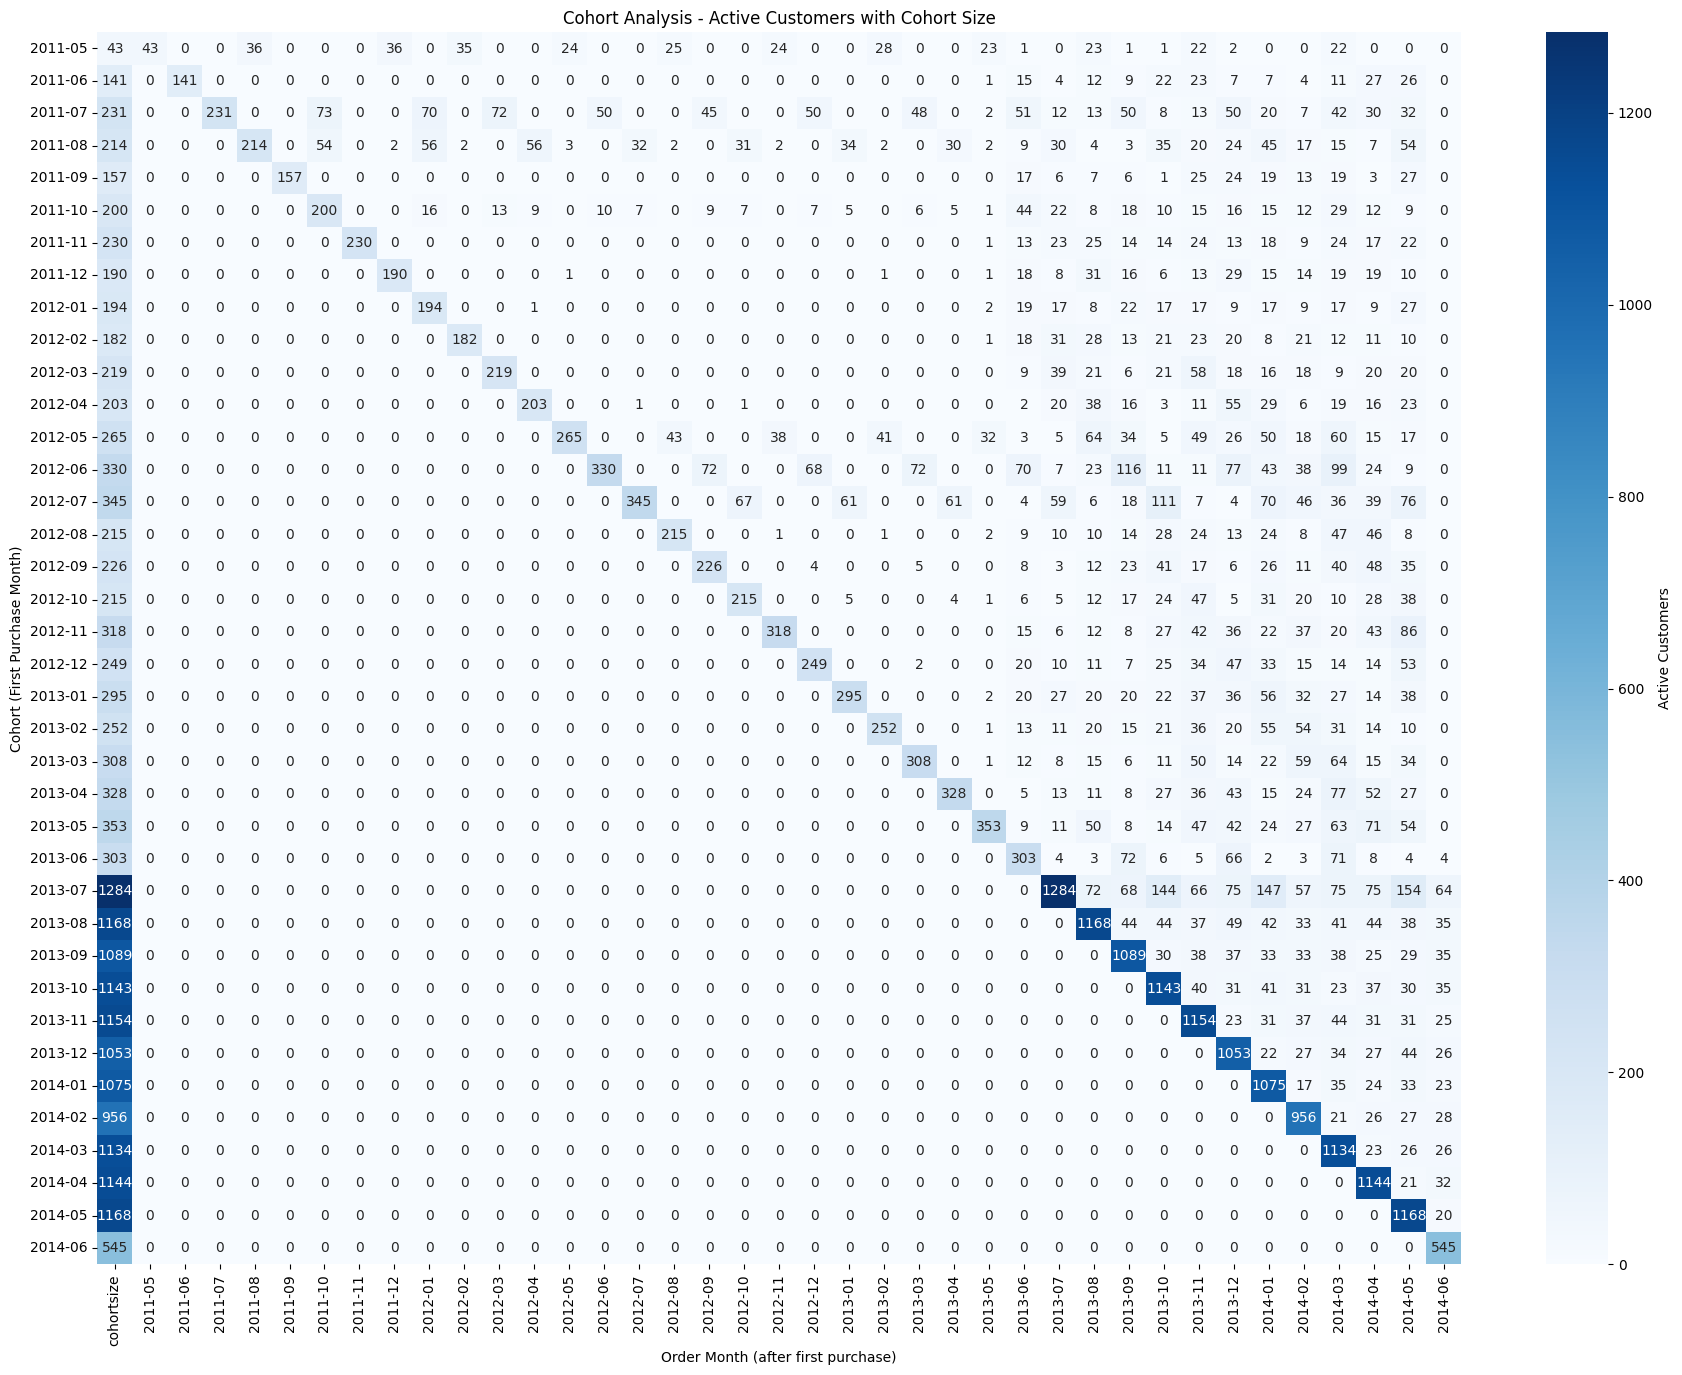

In [54]:
# active customers (include new customer + old customer) across different months after their first purchase.
# Step 1: Pivot the data to make it easier to plot
cohort_pivot = df.pivot_table(
    index='cohortbymonth',  # Cohort (first purchase month)
    columns='orderbymonth',  # Order months after the first purchase
    values='activecustomer',  # Active customers (instead of retention rate)
    aggfunc='sum'  # Sum the active customers per cohort and order month
)

# Step 2: Add cohort size as the first column in the pivot table
# Create a new column with cohort size
cohort_size = df.groupby('cohortbymonth')['cohortsize'].first()

# Convert the cohort_size to a DataFrame and align with the cohort_pivot
cohort_size_df = cohort_size.to_frame('cohortsize')

# Join the cohort size to the cohort pivot table
cohort_pivot_with_size = cohort_size_df.join(cohort_pivot)

# Fill NaN values with 0 if necessary
cohort_pivot_with_size = cohort_pivot_with_size.fillna(0)

# Step 3: Plotting the active customer curve with cohort size first
plt.figure(figsize=(22, 16))
sns.heatmap(cohort_pivot_with_size, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Active Customers'})
plt.title('Cohort Analysis - Active Customers with Cohort Size')
plt.xlabel('Order Month (after first purchase)')
plt.ylabel('Cohort (First Purchase Month)')
plt.show()


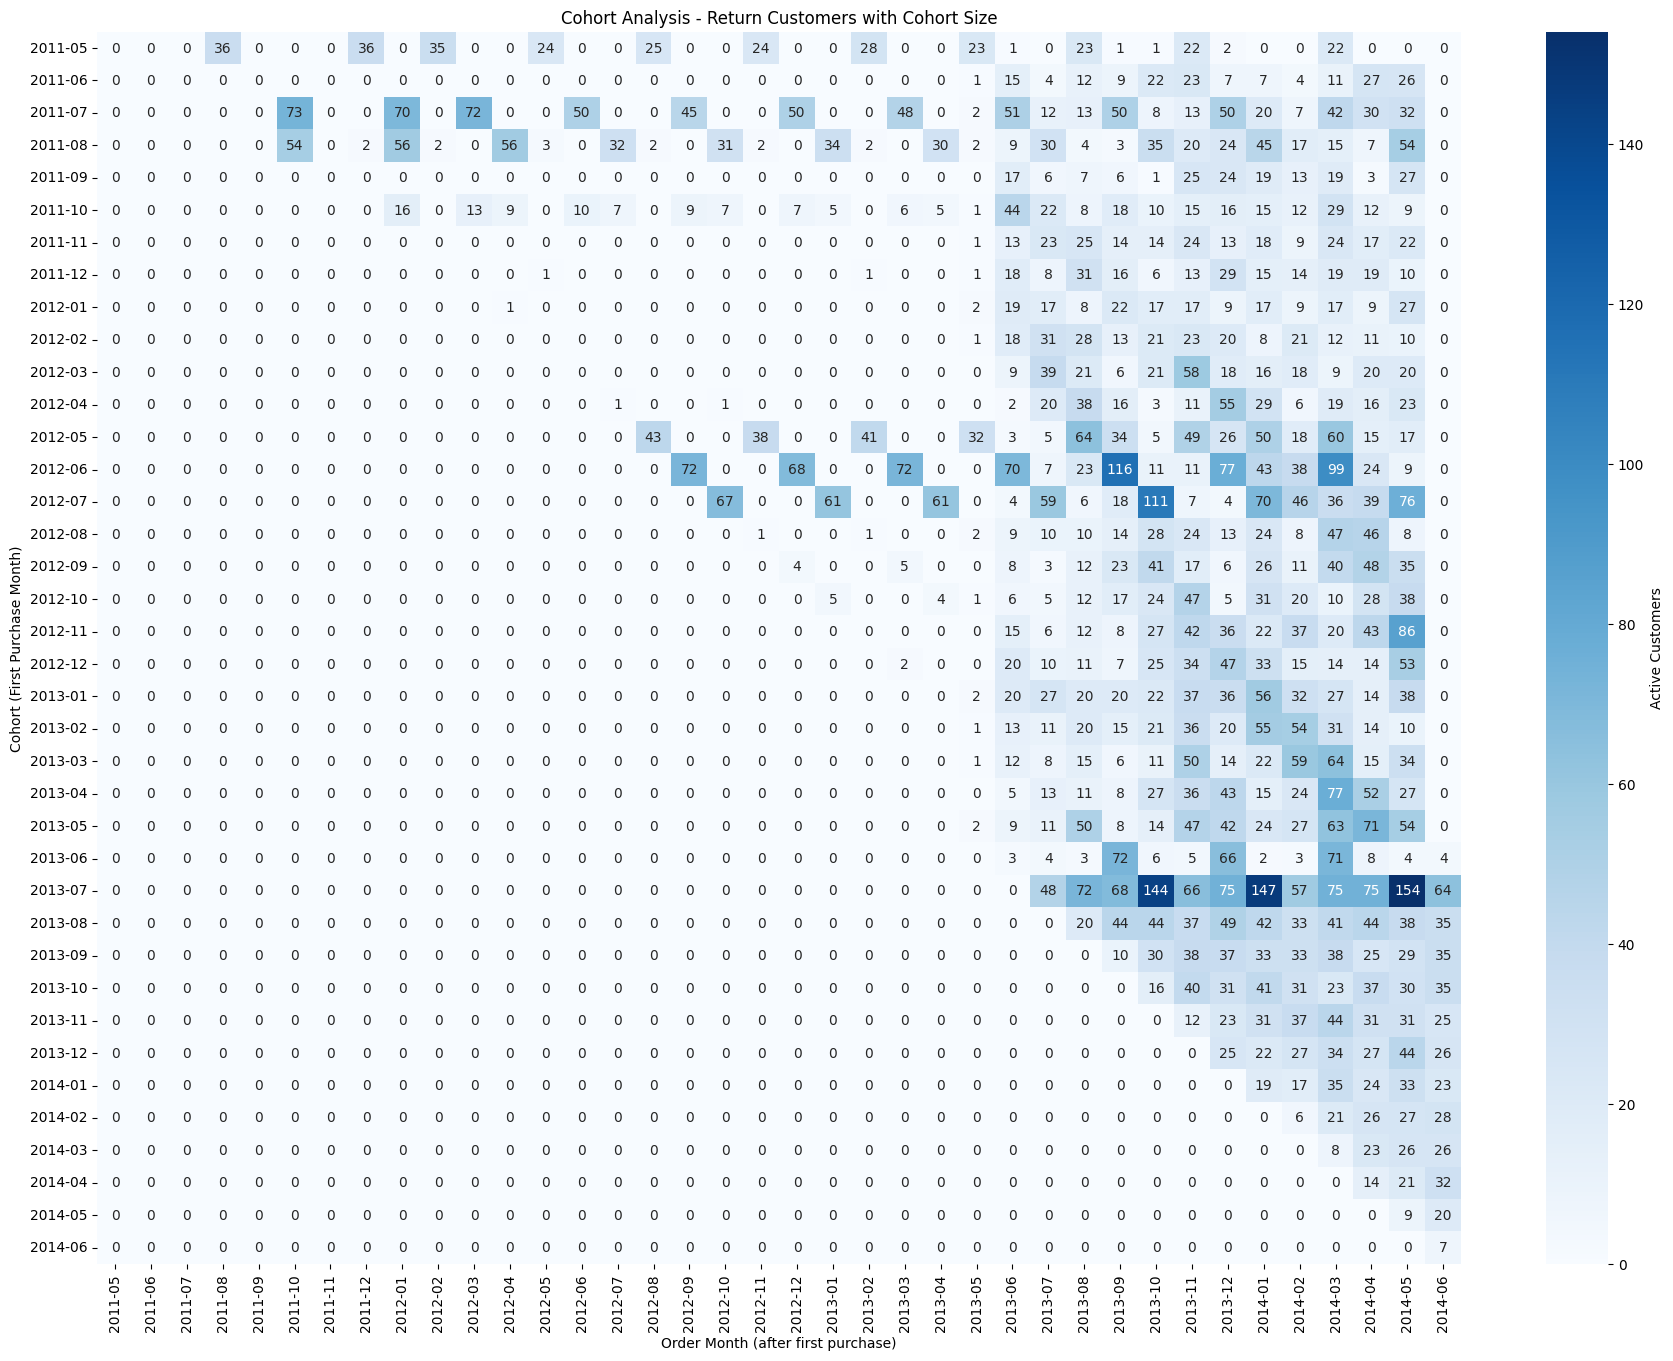

In [ ]:
# performs a cohort analysis to visualize the behavior of Return Customers (old customer) with Cohort Size across different months after their first purchase.

# Step 1: Pivot the data to make it easier to plot
cohort_pivot = df.pivot_table(
    index='cohortbymonth',  # Cohort (first purchase month)
    columns='orderbymonth',  # Order months after the first purchase
    values='returncustomer',  # Active customers (instead of retention rate)
    aggfunc='sum'  # Sum the active customers per cohort and order month
)

# Fill NaN values with 0 if necessary
cohort_pivot = cohort_pivot.fillna(0)

# Step 3: Plotting the active customer curve with cohort size first
plt.figure(figsize=(22, 16))
sns.heatmap(cohort_pivot, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Active Customers'})
plt.title('Cohort Analysis - Return Customers')
plt.xlabel('Order Month (after first purchase)')
plt.ylabel('Cohort (First Purchase Month)')
plt.show()


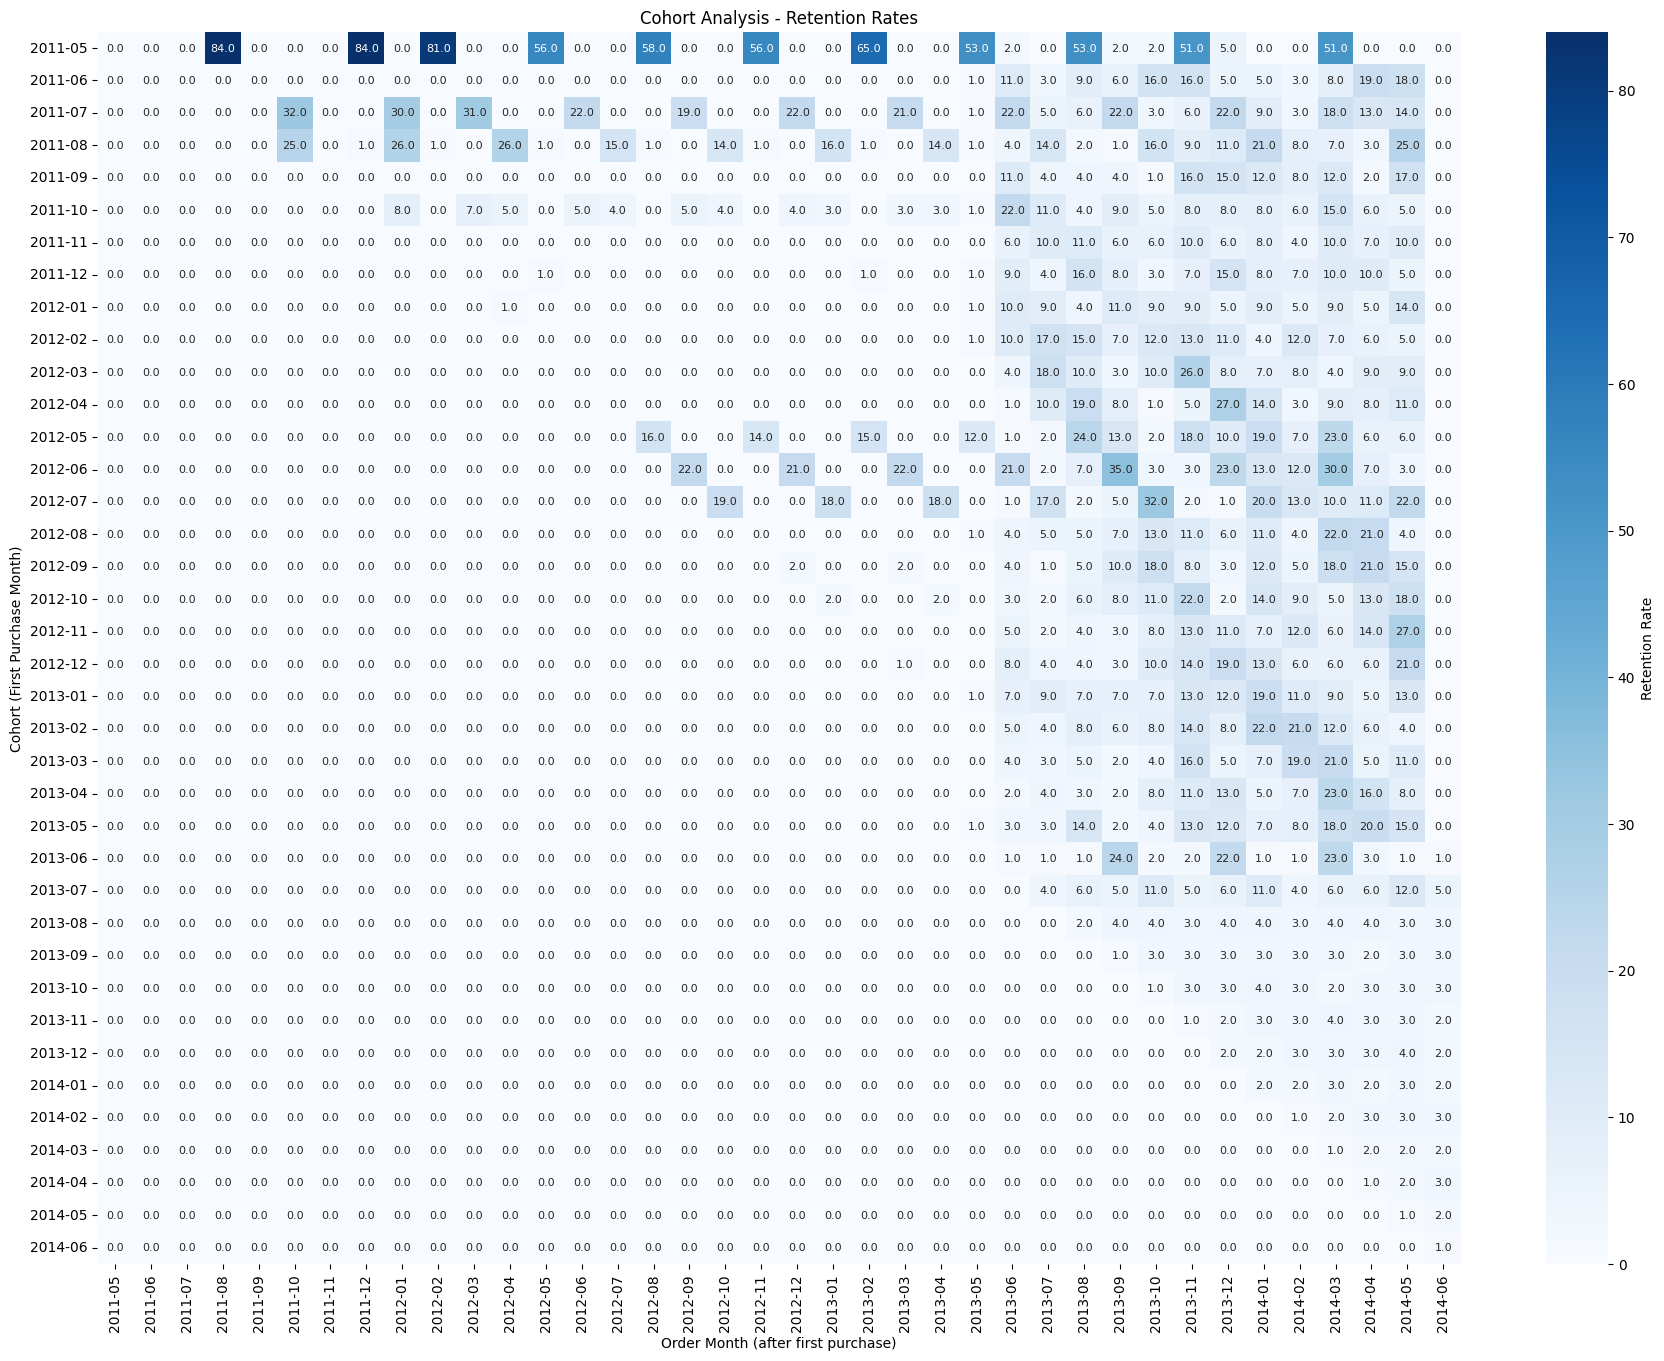

In [34]:
# retention rates across different cohorts
# Pivot the data to make it easier to plot
cohort_pivot = df.pivot_table(
    index='cohortbymonth',  # Cohort (first purchase month)
    columns='orderbymonth',  # Order months after the first purchase
    values='retentionrate',  # Retention rate
    aggfunc='mean'
)

# Multiply retention rate by 100 to convert to percentage
cohort_pivot = cohort_pivot * 100

# Fill NaN values with 0 if necessary
cohort_pivot = cohort_pivot.fillna(0)

# Plotting the cohort retention curve
plt.figure(figsize=(22, 16))
sns.heatmap(cohort_pivot, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Retention Rate'}, annot_kws={'size': 8})  # Make the annotation text smaller)
plt.title('Cohort Analysis - Retention Rates')
plt.xlabel('Order Month (after first purchase)')
plt.ylabel('Cohort (First Purchase Month)')
plt.show()

Observation of the plots above: 

1. Cohort Size Growth (Post-2013-07)
- There was a significant increase in the number of first-time buyers after July 2013.

Possible Reasons:
- A successful marketing campaign or promotion.
- Product launches or seasonal demand increase.
- Changes in business strategy (e.g., expanded product lines or new customer acquisition methods).

2. Return Customer Behavior (Before & After 2013-06)
- Before 2013-06: Customers typically returned after 2 months from their first and next purchase.
- After 2013-06: Customers returned more regularly across all cohorts.

Possible Reasons: 
- Improved customer engagement, better loyalty programs, or retention strategies.
- More appealing pricing, promotions, or product availability.
- Enhanced customer experience leading to repeat purchases.

3. Cohorts from May to August Show Higher Return Rates

Possible Reasons:
- Seasonal effects—certain products may be in higher demand during these months.
- Specific marketing efforts targeting these months.
- Annual shopping trends where customers tend to buy during these periods.

4. Cohorts from 2011-05 to 2013-05 Stopped Purchasing by 2014-06

Possible Reasons:
- Market saturation—these customers had fulfilled their needs.
- Business changes (e.g., pricing, product availability, or service issues).
- Competitive pressure—customers switched to competitors.

5. Higher Retention Rates for Cohorts in Months 5-7

Possible Reasons:
- Seasonal demand leading to stronger customer relationships.
- Effective promotions that encouraged repeat purchases.
- More engaged customers compared to other cohorts.

# RECOMMENDATIONS FOR RETENTION:

1. Leverage Repeat Purchases to Improve Retention
- Recommendation: Since repeat purchases significantly contribute to retention (as shown by the positive correlation between return customers and retention rate), focus on improving loyalty programs or introducing personalized offers to encourage customers to return. 

For example:
- Implement a rewards program where customers earn points for each purchase, which can be redeemed for discounts or exclusive offers.
- Target frequent buyers with exclusive deals or early access to new products to maintain their engagement.
2. Optimize Marketing Campaigns for Newer Cohorts
- Observation: Newer cohorts tend to be larger, but they also have lower retention rates. This suggests that while your business is successfully acquiring new customers, you may struggle with retaining them over time.
- Recommendation: Focus marketing efforts on new customer onboarding to improve retention for these larger cohorts. 

Consider:
- Sending personalized welcome emails with special first-time buyer offers.
- Offering post-purchase follow-ups to enhance the initial experience and remind customers of additional products that may interest them.
- Utilizing email automation to nurture these customers into loyal, repeat buyers.
3. Address Declining Retention with Proactive Strategies
- Observation: There's a slight decline in retention over the years, possibly due to changing customer behavior or increased competition.

To combat this decline, you should consider:
- Predictive churn models: Use past customer behavior (e.g., purchase frequency, basket size) to identify customers who are at risk of churn. Send targeted retention offers to re-engage these customers before they fully disengage.
- Enhancing the customer experience through personalized recommendations, superior customer service, and more tailored communications.
- Post-purchase engagement: Use automated email sequences to re-engage customers who haven’t made a purchase in a while. Offer discounts, ask for feedback, or highlight new product arrivals to bring them back.
4. Improve Retention for Customers Acquired in Late Months
- Observation: Cohort months later in the year show slightly lower retention, possibly due to seasonal effects.
- Recommendation: For customers acquired in later months, create seasonal retention strategies that align with their purchasing habits. 

This could include:
- Targeted ads or offers that are relevant to their interests during the off-season.
- Offering seasonal promotions or exclusive end-of-year sales to incentivize purchases after their initial engagement.
- Encourage engagement with reminder emails for products they might need to restock, like seasonal items or accessories.
5. Maximize Cohort Engagement in Months 5-7
- Observation: Higher retention rates are seen in cohorts from months 5 to 7.
- Recommendation: Since retention is higher in these months, identify and replicate the drivers that contribute to stronger engagement. 

Consider:
- Timing your promotions: Ensure that promotions or new product releases are aligned with these peak engagement months to maximize their impact.
- Upselling or cross-selling: In these high-engagement months, upsell customers with complementary products or offer package deals that encourage larger orders.
6. Investigate and Enhance Engagement with Customers from Cohorts After 2013-06
- Observation: After June 2013, return customers seem to make purchases more regularly across cohorts.
- Recommendation: Investigate what changed in your customer experience or marketing strategy post-2013 to better understand why this pattern emerged.

Consider:
- Analyze changes in product offerings, pricing, or marketing approaches that could have contributed to the increased regularity of returns.
- Use these insights to enhance personalization across customer segments, making the buying experience more tailored and rewarding for customers.
7. Monitor and Manage Cohorts with Low Engagement
- Observation: Cohorts from 2011-05 to 2013-05 stopped purchasing by 2014-06, possibly due to market saturation or competitive pressures.
- Recommendation: For these groups, take proactive steps to either re-engage or gracefully disengage. 

Consider:
- Conducting win-back campaigns that offer customers incentives to return, such as discounts or bundled deals.
- Exit surveys for customers who stop purchasing to understand the root causes (pricing, competition, product dissatisfaction) and adapt your offerings.
- If market saturation is the issue, consider diversifying your product range or offering exclusive, limited-time products to reignite interest in these cohorts.
8. Utilize Seasonality to Drive Engagement
- Observation: Cohorts from May to August show higher return rates, likely due to seasonal effects or marketing efforts.

Maximize seasonal trends by:
- Running seasonal promotions targeting these months and using time-sensitive discounts to create urgency.
- Offering products that are seasonally relevant to these cohorts, such as summer or holiday-related items, to drive purchases.
- Consider launching seasonal campaigns or events in these months to build excitement and reinforce customer loyalty.
9. Improve Retention for Larger Cohorts
- Observation: Larger cohorts tend to show lower retention rates.

To address this, you might need to:
- Segment larger cohorts into smaller groups based on behavior, demographics, or product preferences and then tailor retention efforts to each group.
- Implement targeted retention strategies for high-value customers within large cohorts, such as VIP programs, early access to products, or personalized offers.


# CUSTOMERS LIFETIME VALUE (CLV) ANALYSIS 

Step 1: Load & Process Data
First, let's load the dataset and create a cohort label for each group.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("cohortCLV2.csv")  # Replace with actual file

df["monthlyrevenue"] = df["monthlyrevenue"].apply(lambda x: f"{x:,.2f}")
df["lifetimevalue"] = df["lifetimevalue"].apply(lambda x: f"{x:,.2f}")

print(df.head())

   cohortyear  cohortmonth  monthssincefirstpurchase monthlyrevenue  \
0        2011            5                         0     567,020.95   
1        2011            5                         3     943,043.89   
2        2011            5                         7     797,767.73   
3        2011            5                         9     988,048.36   
4        2011            5                        12   1,143,410.57   

  lifetimevalue  
0    567,020.95  
1  1,510,064.84  
2  2,307,832.57  
3  3,295,880.93  
4  4,439,291.50  


In [36]:
df["monthlyrevenue"] = df["monthlyrevenue"].replace(",", "", regex=True).astype(float)
df["lifetimevalue"] = df["lifetimevalue"].replace(",", "", regex=True).astype(float)

In [37]:
df.dtypes

cohortyear                    int64
cohortmonth                   int64
monthssincefirstpurchase      int64
monthlyrevenue              float64
lifetimevalue               float64
dtype: object

In [38]:

# Create a Cohort label (e.g., "2011-01", "2012-02")
df["Cohort"] = df["cohortyear"].astype(str) + "-" + df["cohortmonth"].astype(str).str.zfill(2)

# Ensure sorting
df = df.sort_values(by=["Cohort", "monthssincefirstpurchase"])


In [39]:
df

,cohortyear,cohortmonth,monthssincefirstpurchase,monthlyrevenue,lifetimevalue,Cohort
0,2011,5,0,567020.95,567020.95,2011-05
1,2011,5,3,943043.89,1510064.84,2011-05
2,2011,5,7,797767.73,2307832.57,2011-05
3,2011,5,9,988048.36,3295880.93,2011-05
4,2011,5,12,1143410.57,4439291.50,2011-05
...,...,...,...,...,...,...
480,2014,4,1,1390.11,826053.51,2014-04
481,2014,4,2,2051.93,828105.44,2014-04
482,2014,5,0,859324.19,859324.19,2014-05
483,2014,5,1,1494.24,860818.43,2014-05


Step 2: Aggregate Data
To make visualization clearer, we can:

Aggregate Monthly Revenue by cohort.
Compute Cumulative Lifetime Value per cohort.

In [40]:
# Aggregate total revenue by cohort and month
cohort_agg = df.groupby(["Cohort", "monthssincefirstpurchase"]).agg({
    "monthlyrevenue": "sum",
    "lifetimevalue": "max"
}).reset_index()


In [41]:
# Pivot for visualization
revenue_pivot = cohort_agg.pivot(index="monthssincefirstpurchase", columns="Cohort", values="monthlyrevenue")
clv_pivot = cohort_agg.pivot(index="monthssincefirstpurchase", columns="Cohort", values="lifetimevalue")

Step 3: Visualize Monthly Revenue by Cohort
Now, let's plot revenue trends for different cohorts over time.

In [42]:
revenue_pivot

Cohort,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,...,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
monthssincefirstpurchase,,,,,,,,,,,,,,,,,,,,,
0,567020.95,507096.47,2292182.88,1857532.28,554791.61,687964.16,815313.02,660349.58,680503.46,654742.31,...,446938.21,527989.14,597424.07,389190.27,432602.95,390151.84,649604.85,824663.40,859324.19,30808.43
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1724.85,2528.05,1115.65,1277.17,952.20,1596.36,1821.88,1390.11,1494.24,NaN
2,NaN,NaN,NaN,1884605.93,NaN,NaN,NaN,NaN,NaN,NaN,...,2932.85,9565.74,4591.91,1681.81,4319.14,1610.96,1833.47,2051.93,NaN,NaN
3,943043.89,NaN,2583699.45,NaN,NaN,63010.45,NaN,NaN,4377.76,NaN,...,12478.49,16745.45,7100.66,2046.49,1903.74,1564.66,1326.29,NaN,NaN,NaN
4,NaN,NaN,NaN,4331.59,NaN,NaN,NaN,NaN,NaN,NaN,...,2104.94,12218.98,31034.13,4288.55,15626.05,1736.52,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1604049.68,NaN,31687.31,NaN,2677.92,NaN,NaN,...,4769.94,1398.01,7661.68,24015.87,1653.22,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2110773.86,6261.23,NaN,39260.11,NaN,NaN,NaN,NaN,...,4539.28,1990.77,1667.08,1700.07,NaN,NaN,NaN,NaN,NaN,NaN
7,797767.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1481.43,1792.98,1329.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,2523832.31,1128027.02,NaN,27690.90,NaN,NaN,NaN,NaN,...,1965.60,2448.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
revenue_pivot.to_csv('revenue_pivot.csv', index=True)  # Save with index

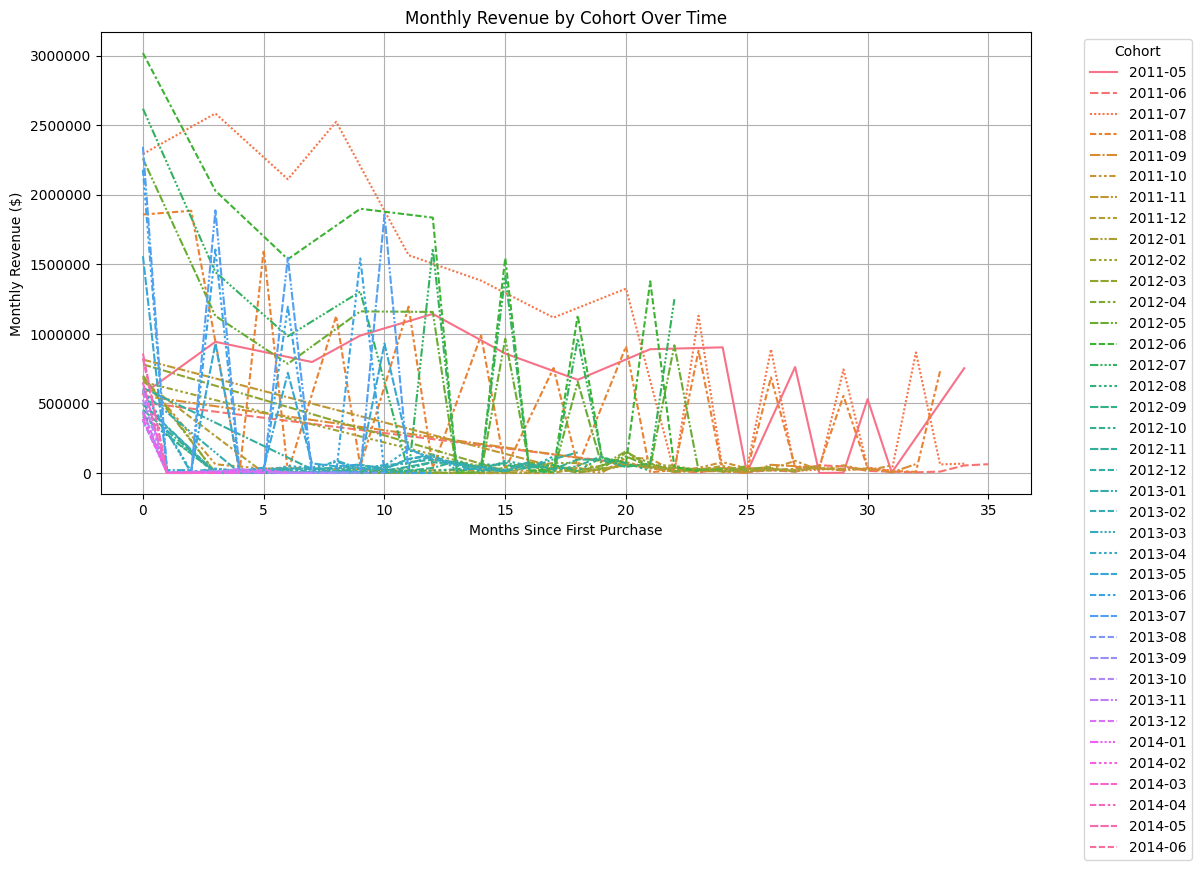

In [43]:
# 1. Monthly Revenue Over Time by Cohort
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_pivot)
plt.title("Monthly Revenue by Cohort Over Time")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Monthly Revenue ($)")
plt.legend(title="Cohort", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()


Observation:

1. High Variability in Spending Over Time:
- The spending patterns show significant fluctuations, especially in certain months (e.g., large spikes in 2011-07, 2012-04, and 2013-12). This suggests that certain cohorts may be particularly responsive to promotional activities, seasonality, or product releases. Understanding these spikes can help identify what drives customer spending during specific periods.

2. Retention and Declining Spend:
- Over time, many cohorts seem to experience a drop in spending (e.g., in 2012-07 and later years), which could be an indicator of customer churn. If the decrease is significant after the first year or two, it might reflect customers who are no longer engaging with the business.

3. Data Gaps Indicating Potential Inactive Customers:
- The missing values in certain rows might indicate periods where customers stopped making purchases, suggesting either inactive customers or data reporting issues. Identifying if these gaps are due to churn or simply gaps in data could provide more accurate retention insights.

4. Cohort-Based Differences in Spending:
- Some cohorts (e.g., customers from 2011-06) show high spending right after their first purchase, indicating that they may have been high-value early adopters. However, the patterns from later cohorts (e.g., 2012-06) suggest that not all cohorts behave similarly, which could mean that customer acquisition strategies need to be adapted for different segments.

5. Early-Stage Cohorts Drive Significant Revenue:
- Some of the early months (e.g., 2011-05, 2011-06, etc.) have relatively high revenue, likely because those customers are in their early stages of purchasing and might still be testing the product/service. It's essential to nurture these customers with targeted engagement strategies to turn them into repeat buyers and reduce churn.

6. Impact of Promotions and External Events:
- Large fluctuations in certain months (e.g., 2013-01, 2012-12) might be due to holiday seasons or special promotions. Understanding how external factors affect customer purchasing behavior can help plan future campaigns.

Step 4: Visualize Cumulative Lifetime Value (CLV)
Now, let's plot how CLV grows for each cohort over time.

In [57]:
clv_pivot

Cohort,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,...,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
monthssincefirstpurchase,,,,,,,,,,,,,,,,,,,,,
0,567020.95,507096.47,2292182.88,1857532.28,554791.61,687964.16,815313.02,660349.58,680503.46,654742.31,...,446938.21,527989.14,597424.07,389190.27,432602.95,390151.84,649604.85,824663.40,859324.19,30808.43
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,448663.06,530517.19,598539.72,390467.44,433555.15,391748.21,651426.73,826053.51,860818.43,NaN
2,NaN,NaN,NaN,3742138.21,NaN,NaN,NaN,NaN,NaN,NaN,...,451595.91,540082.93,603131.63,392149.25,437874.29,393359.16,653260.21,828105.44,NaN,NaN
3,1510064.84,NaN,4875882.33,NaN,NaN,750974.60,NaN,NaN,684881.22,NaN,...,464074.39,556828.38,610232.29,394195.74,439778.03,394923.82,654586.49,NaN,NaN,NaN
4,NaN,NaN,NaN,3746469.80,NaN,NaN,NaN,NaN,NaN,NaN,...,466179.33,569047.36,641266.42,398484.29,455404.08,396660.34,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5350519.48,NaN,782661.92,NaN,663027.50,NaN,NaN,...,470949.27,570445.38,648928.10,422500.16,457057.30,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,6986656.19,5356780.71,NaN,821922.03,NaN,NaN,NaN,NaN,...,475488.55,572436.15,650595.18,424200.22,NaN,NaN,NaN,NaN,NaN,NaN
7,2307832.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,476969.98,574229.13,651924.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,9510488.50,6484807.72,NaN,849612.93,NaN,NaN,NaN,NaN,...,478935.58,576677.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
clv_pivot.to_csv('clv_pivot.csv', index=True)  # Save with index


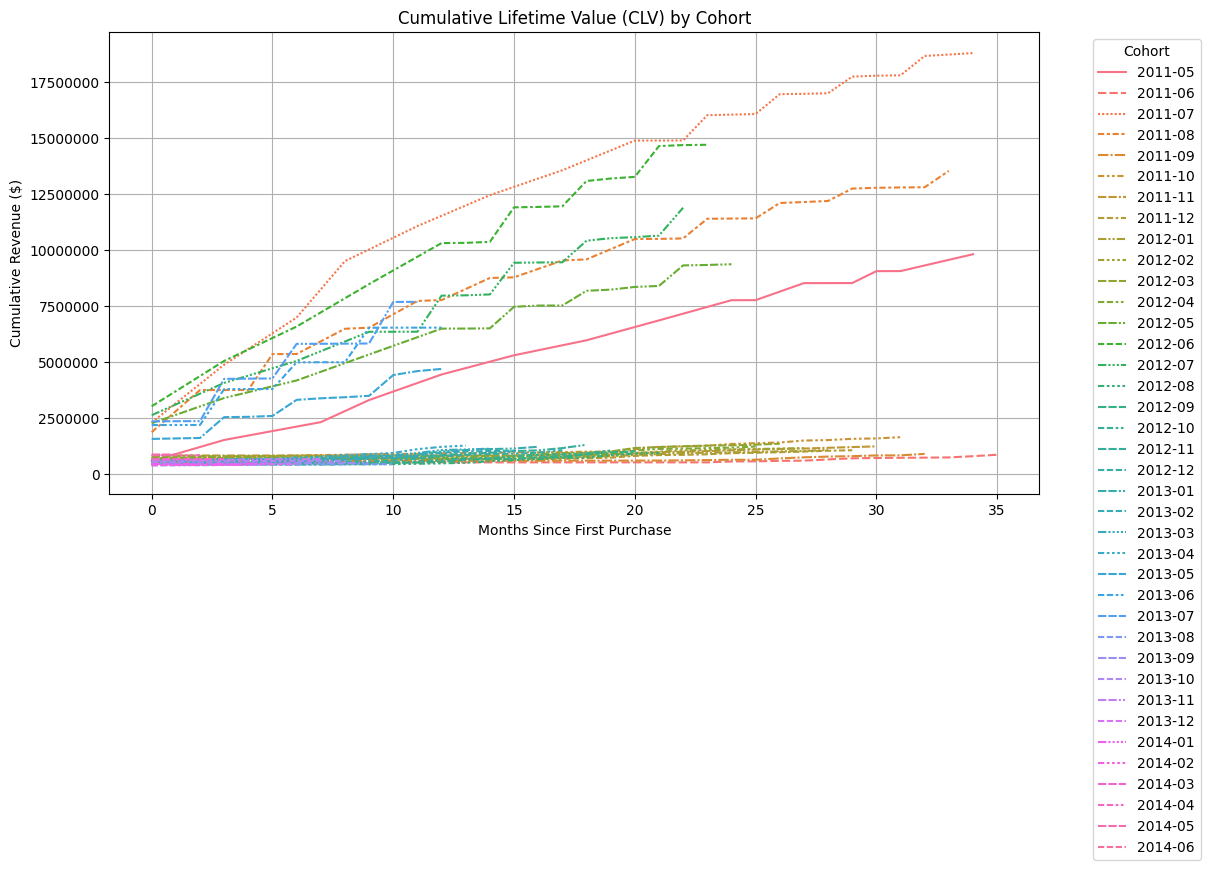

In [44]:

# 2. Cumulative Lifetime Value by Cohort
plt.figure(figsize=(12, 6))
sns.lineplot(data=clv_pivot)
plt.title("Cumulative Lifetime Value (CLV) by Cohort")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cumulative Revenue ($)")
plt.legend(title="Cohort", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()


Observations: 

1. Cohort Size Growth & Customer Engagement
- There was a sharp increase in revenue from July 2013 onward, indicating an acquisition push or strong customer engagement.
- Pre-2013 cohorts have smaller revenue, suggesting slower customer growth during those years.
2. Customer Retention & CLV Trends
- Pre-2013 cohorts tend to drop off faster, meaning customers disengaged earlier.
- Post-2013 cohorts exhibit more sustained revenue, suggesting improved retention or repeated purchases.
- May-Aug cohorts consistently have higher revenue, which aligns with seasonality (e.g., summer shopping trends).
3. Revenue Peaks & Drops
- Certain months, like May-Aug, consistently generate higher revenue, possibly due to promotions or seasonal demand.
- Some older cohorts (e.g., 2011-2013) cut purchases entirely after June 2014, indicating a shift in business strategy or customer churn.

# RECOMMENDATIONS FOR CUSTOMER LIFETIME VALUE 

1. Analyze Spending Spikes: 
- Identify the drivers behind spending spikes in specific months (e.g., 2011-07, 2012-04, 2013-12) to replicate successful promotions or seasonal strategies during those periods.

2. Focus on Retention: 
- Address the drop in spending over time by enhancing retention strategies, especially for cohorts showing signs of churn after the first year. This could include personalized outreach or loyalty programs.

3. Investigate Data Gaps: 
- Investigate the missing values to determine whether they indicate actual customer inactivity or data reporting issues. This will improve accuracy in CLV predictions and retention analysis.

4. Tailor Acquisition Strategies: 
- Recognize that different cohorts (e.g., 2011-06 vs. 2012-06) have different behaviors. Adapt customer acquisition strategies to meet the expectations and preferences of each cohort.

5. Nurture Early-Stage Customers: 
- Target early-stage customers with engaging strategies to turn them into repeat buyers, reducing churn and maximizing CLV.

6. Leverage Promotions and External Events: 
- Use knowledge of seasonal trends and promotions (e.g., May-Aug) to plan campaigns that align with high-revenue periods and customer purchasing behavior.

7. Enhance Post-2013 Cohorts: 
- Since post-2013 cohorts show more sustained revenue, focus on expanding this trend with strategies that maintain engagement and repeat purchases.

8. Address Churn in Older Cohorts: 
- For older cohorts (e.g., 2011-2013), analyze why customers stop purchasing (e.g., shift in strategy, product issues, competition) and adjust business practices to prevent churn.